## Naive Bayes Classifier

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset preview: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

==========GaussianNB===========
Accuracy:  0.7077922077922078
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   m

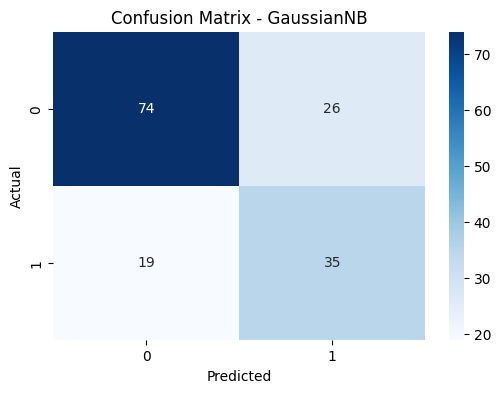


==========MultinomialNB===========
Accuracy:  0.564935064935065
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       100
           1       0.37      0.33      0.35        54

    accuracy                           0.56       154
   macro avg       0.51      0.51      0.51       154
weighted avg       0.56      0.56      0.56       154



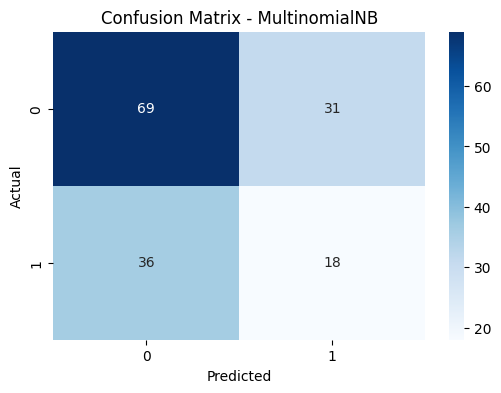

Model CategoricalNB could not be applied. Error: index 846 is out of bounds for axis 1 with size 745


In [4]:
# Navie Bayes Classifier Implementation
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

# Load the dataset from URL (symptoms and disease dataset)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url, on_bad_lines='skip', engine='python')

print("Dataset preview: ")
print(df.head())

# for this dataset, target colum = "outcome".
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

# Encode target if needed
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
    
# Train-test split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# try different naive bayes classifiers 
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "CategoricalNB": CategoricalNB()
}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"\n=========={name}===========")
        print(f"Accuracy: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        
        # confusion matrix heatmap
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    except Exception as e:
        print(f"Model {name} could not be applied. Error: {e}")